# Ultra Diffuse Galaxies Data Analysis

### Imports

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/5P/kb231024_00056_icubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/5P/kb231024_00056_icubes.fits 3328.0
The beginning and ending wavelength cuts for the cube are 304.00 and 2297.00 respectively


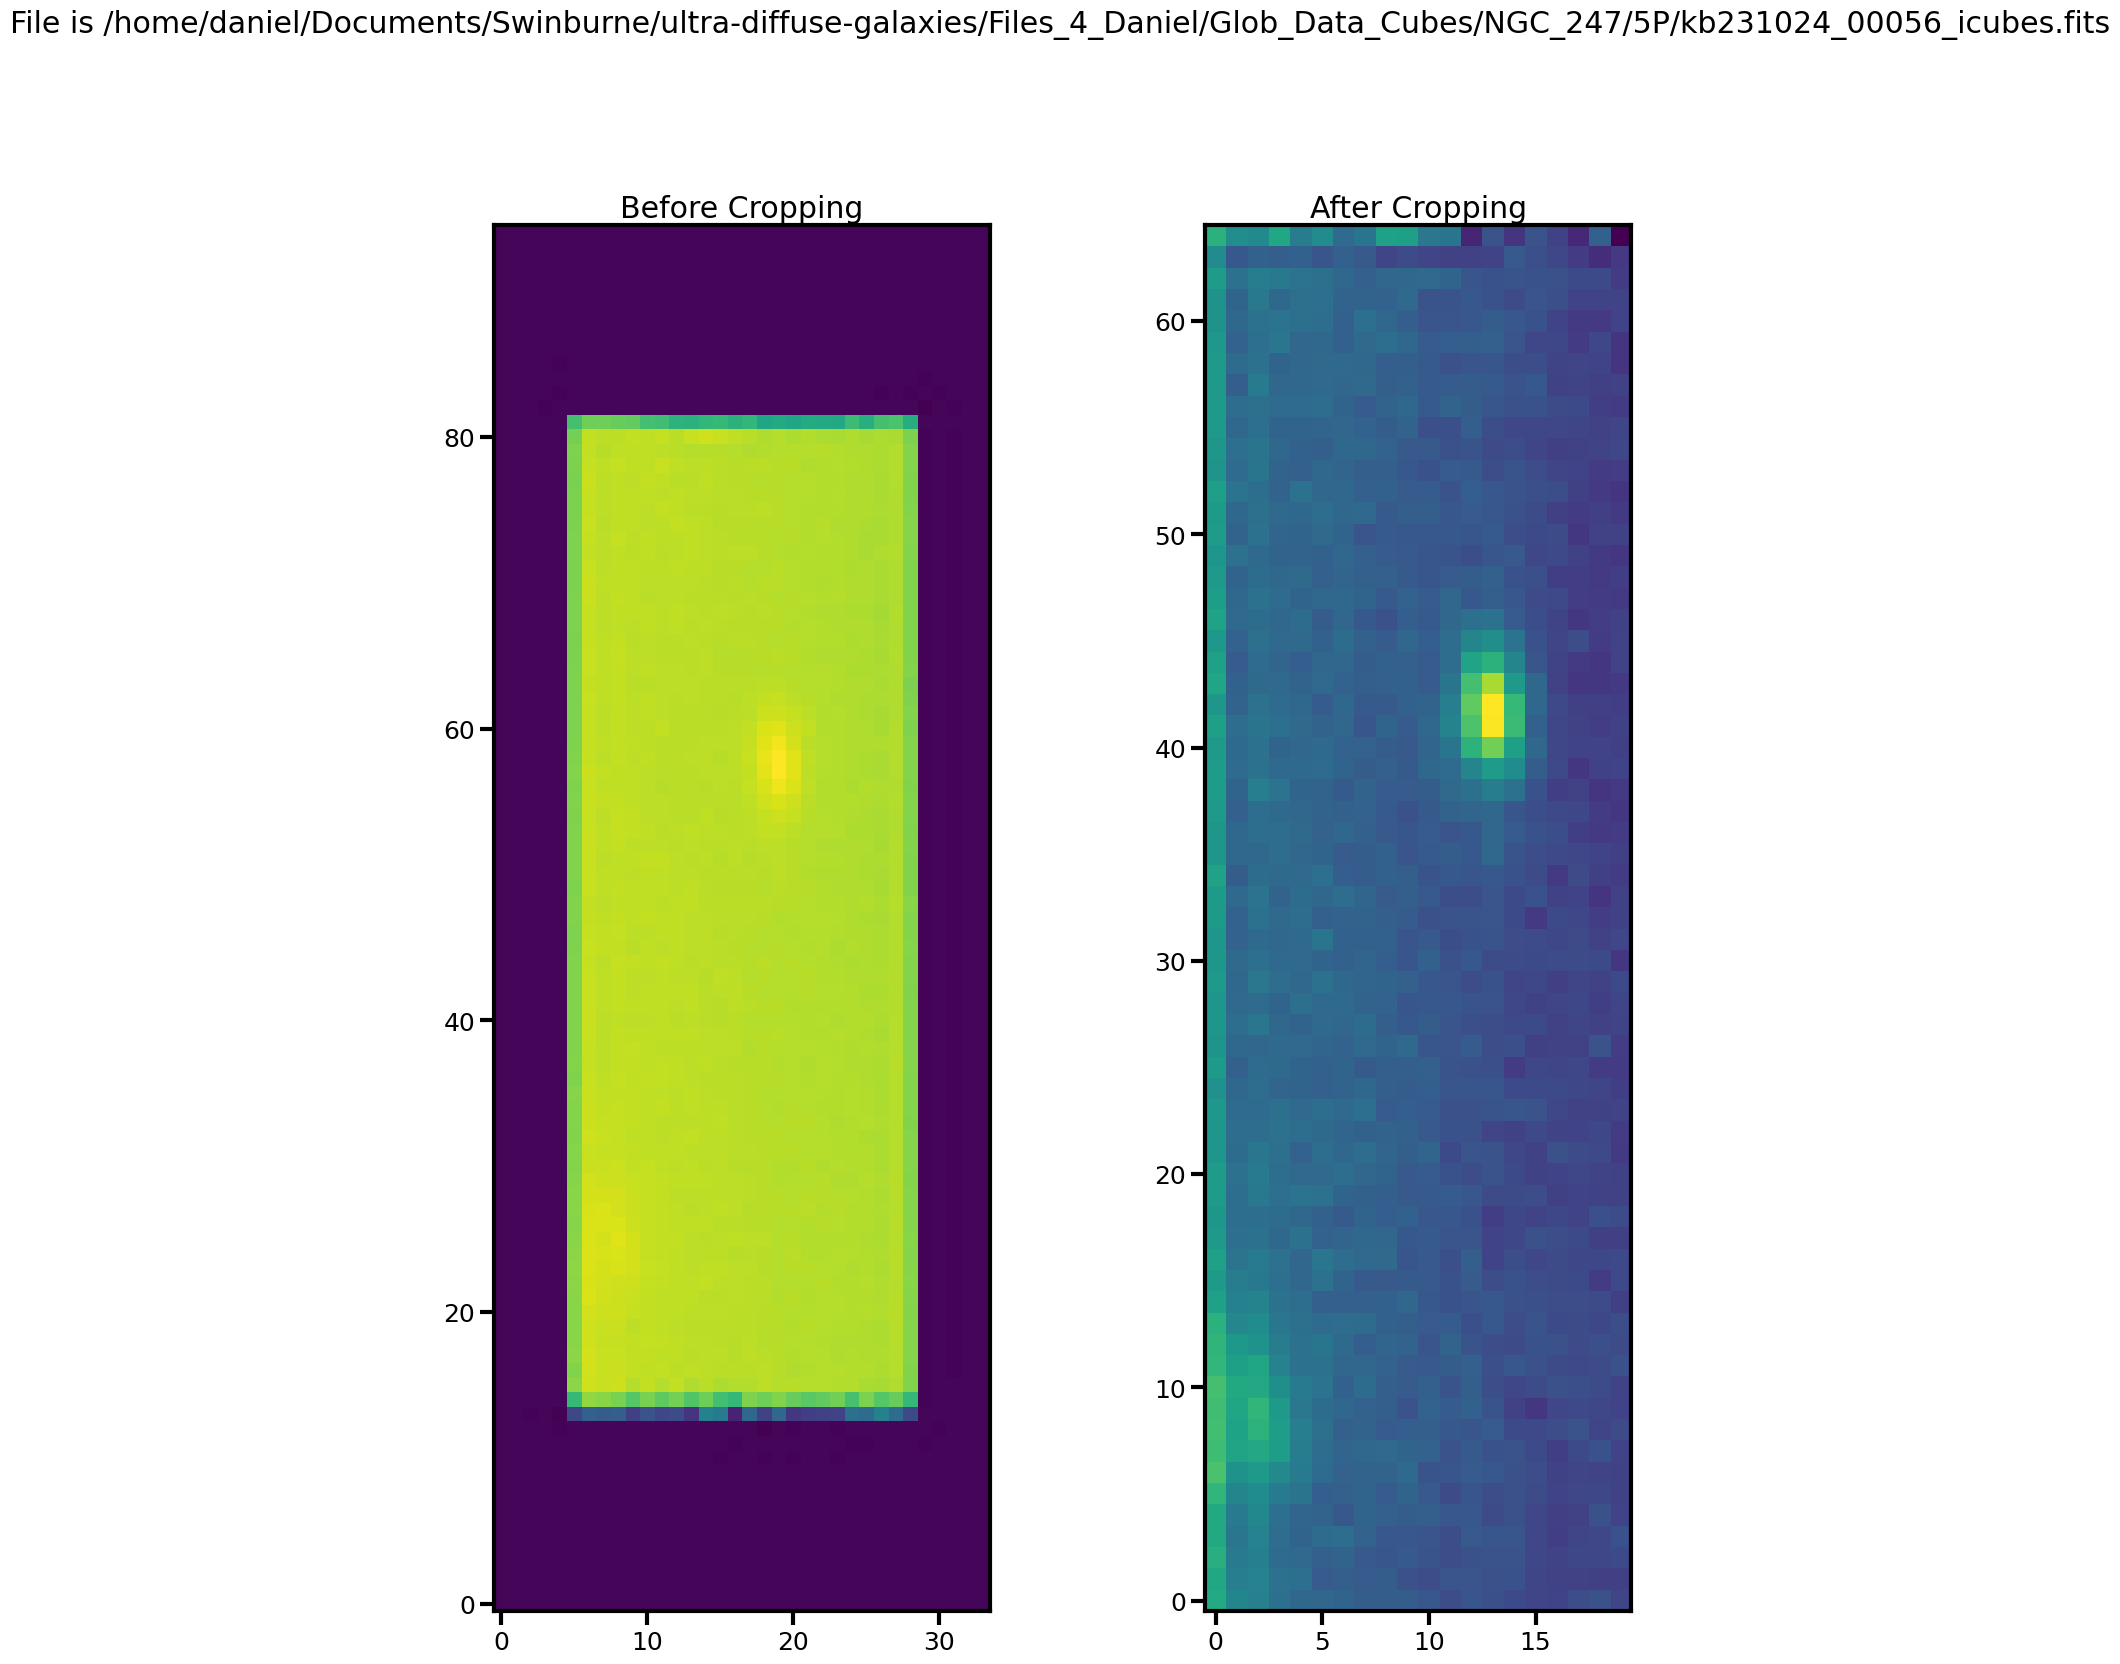

Files Written out
Code Competed Successfully in, 5953.62 seconds


In [195]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/5P/' # path to directory containing spectra
s1_file_keyword = '*kb*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 26
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 81

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [200]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/5P' # path to directory containing spectra
s2_file_keyword = '*icubes*' # keyword to find files in directory
corrections = 'manual' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Delta correction: {np.diff(bary_corr)} km/s')

Barycentric correction: [0] km/s
Delta correction: [] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/5P/obj1/56.fits']
[3632. 3633. 3634. ... 5622. 5623. 5624.]


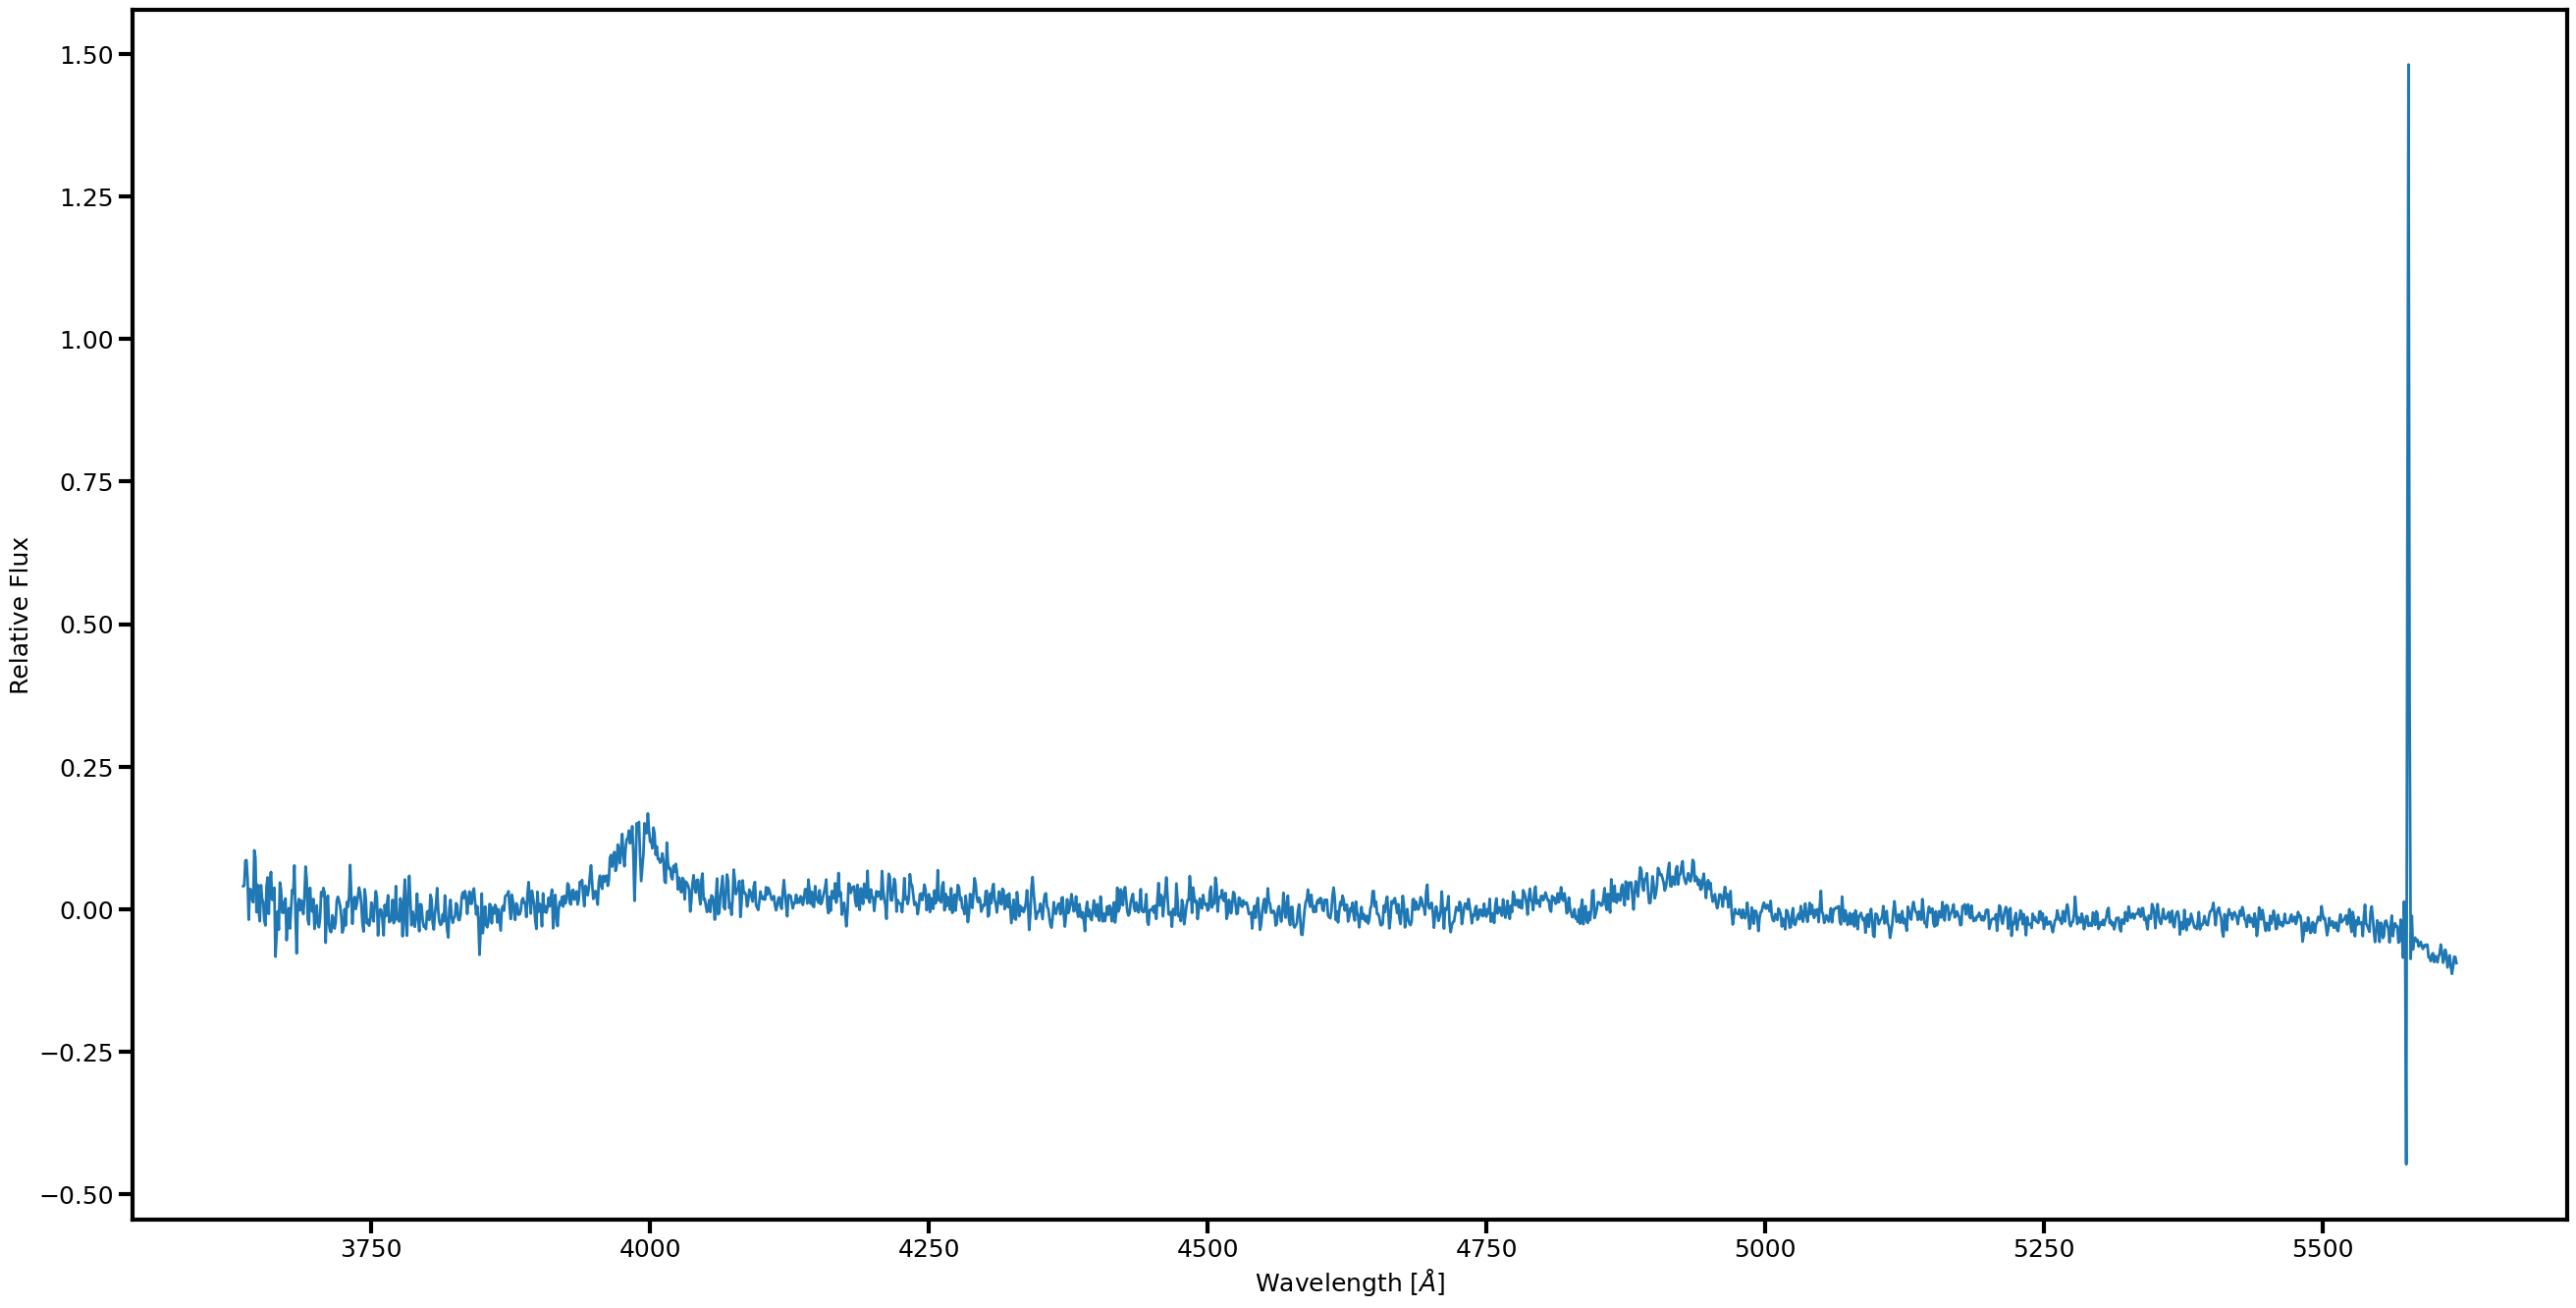

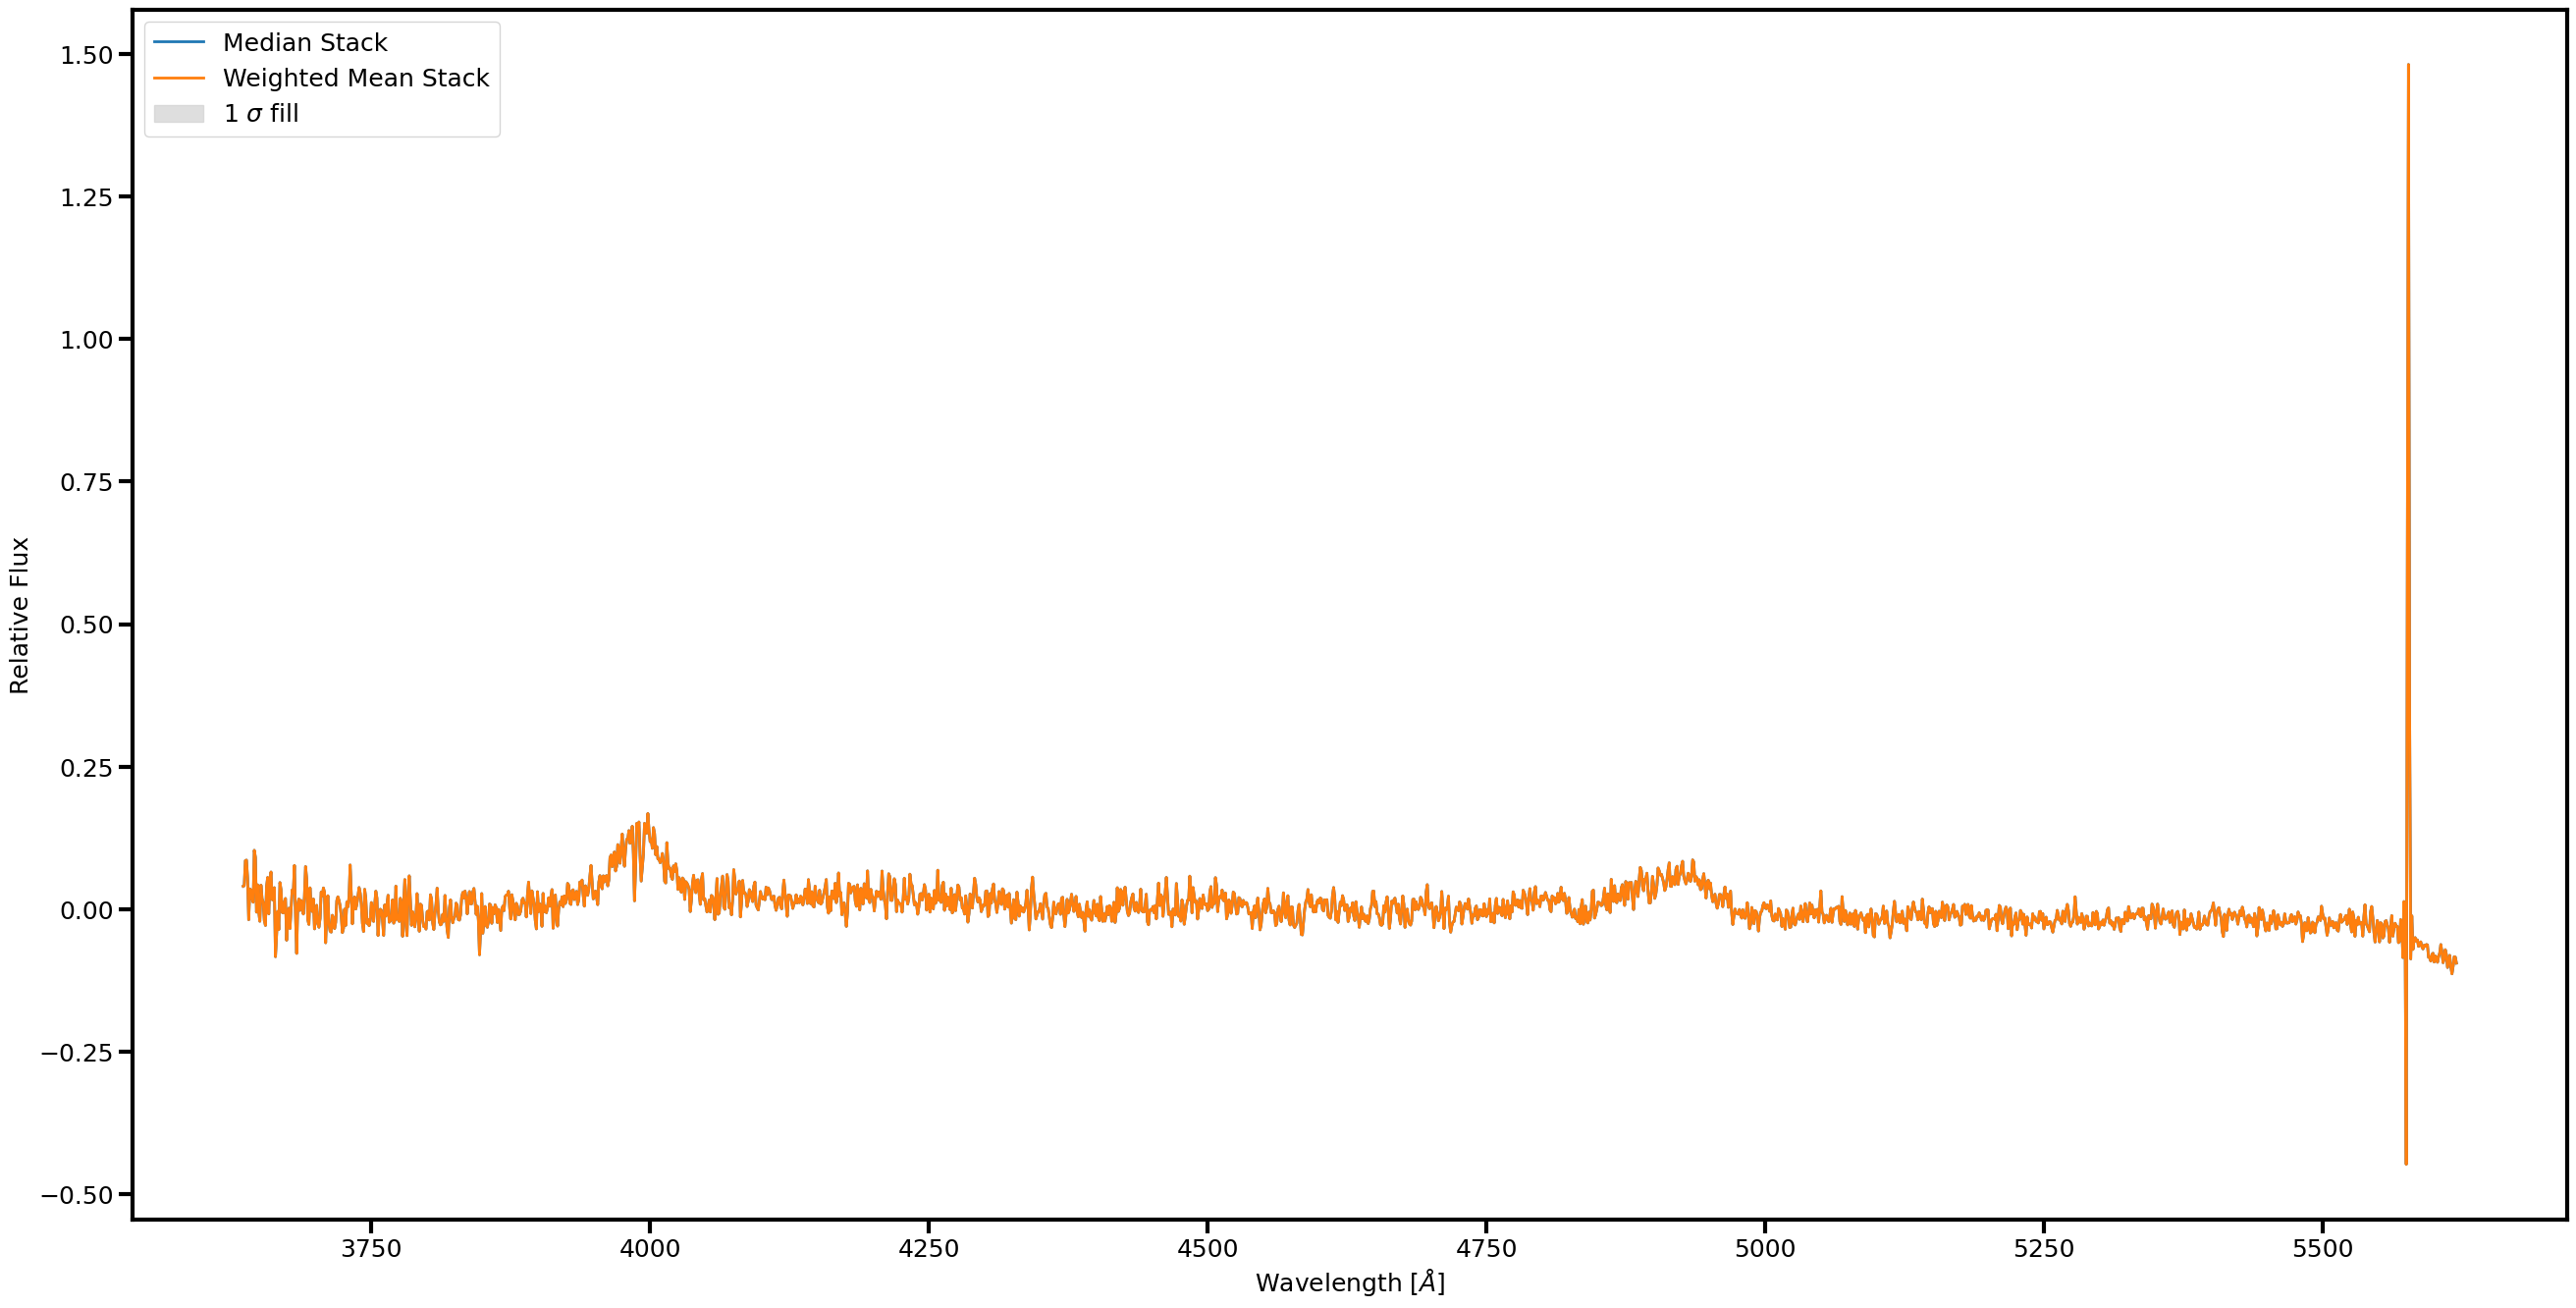

File Written Out
File Written Out
Code Competed Successfully in, 6981.69 seconds


In [201]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/5P/obj2/' # path to directory containing spectra
s3_file_keyword = '5*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)

### step 4.1: Check ppxf velocities of degrees

100%|██████████| 40/40 [00:46<00:00,  1.15s/it]


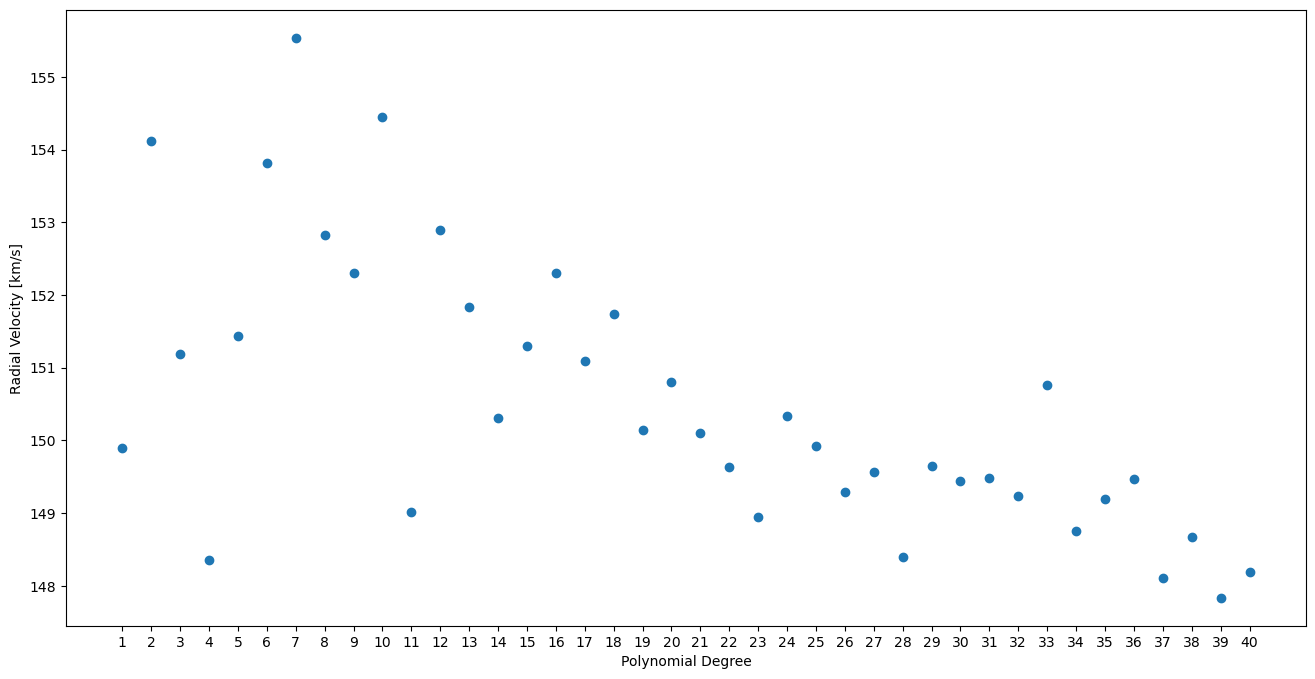

In [172]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs2/obj3/mean_NCS.fits' # path to ppxf input file
out_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/NGC_247/GCs2/obj3/vel_vs_deg.png' # path to save vel_vs_deg plot
fwhm_gal = 5000 / 1800 # instrument resolution
min_degrees, max_degrees = 1, 40 # min and max degrees for Legendre polynomials

degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
velocities = []
for deg in tqdm(degrees):
    vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
    clear_output(wait=True)
    velocities.append(vel)
plt.close()

plt.figure(figsize=(16, 8))
plt.scatter(degrees, velocities)
plt.xlabel("Polynomial Degree")
plt.ylabel("Radial Velocity [km/s]")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.savefig(out_file)
plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       151        53     0.015     0.056
chi2/DOF: 1367.; DOF: 1833; degree = 5; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/150
Formal errors:
     dV    dsigma   dh3      dh4
      53      42     0.6    0.29
Elapsed time in pPXF: 0.50 s
Best-fitting redshift z = 0.00051 +/- 0.00018


(151.4364647899595,
 52.75770924558973,
 0.0005052652770962673,
 0.00017688585403179182)

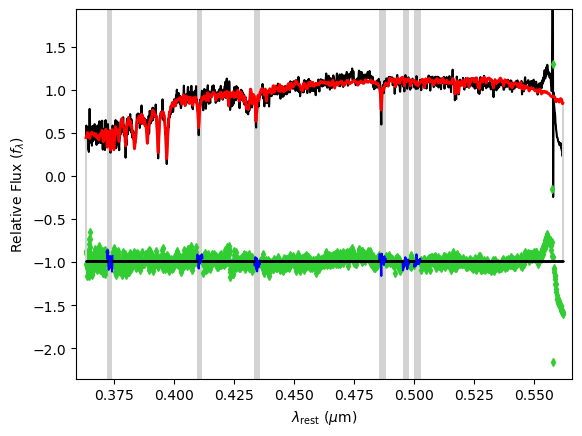

In [193]:
""" User inputs """
degree = 5

ppxf_kinematics(ppxf_file, fwhm_gal, degree)